## 三、爬取《隐秘而伟大》的收视情况，并保存

## 四、数据爬取主程序

# 数据分析

In [ ]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
!mkdir /home/aistudio/external-libraries
!pip install matplotlib -t /home/aistudio/external-libraries
!pip install wordcloud -t /home/aistudio/external-libraries

mkdir: cannot create directory ‘/home/aistudio/external-libraries’: File exists
Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 10.3MB 13.6MB/s eta 0:00:01
     |████████████████████████████████| 235kB 26.0MB/s eta 0:00:01
     |████████████████████████████████| 1.1MB 37.8MB/s eta 0:00:01
     |████████████████████████████████| 15.3MB 8.7MB/s eta 0:00:011
     |████████████████████████████████| 3.0MB 15.3MB/s eta 0:00:01
     |████████████████████████████████| 71kB 20.5MB/s eta 0:00:01
ERROR: blackhole 1.0.1 has requirement numpy<=1.19.5, but you'll have numpy 1.20.3 which is incompatible.
Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 368kB 14.5MB/s eta 0:00:01
     |████████████████████████████████| 10.3MB 24.0MB/s eta 0:00:01
     |████████████████████████████████| 15.3MB 9.6MB/s eta 0:00:011
     |████████████████████████████████| 3.0MB 14.6MB/s eta 0:00:01
     |███████████████████

In [ ]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可:
import sys
sys.path.append('/home/aistudio/external-libraries')

In [ ]:
# 下载中文字体
#!wget https://mydueros.cdn.bcebos.com/font/simhei.ttf
# # 将字体文件复制到matplotlib字体路径
# !cp /home/aistudio/work/simhei.ttf /opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/
# # 创建系统字体文件路径
!mkdir .fonts
# 复制文件到该路径
!cp  /home/aistudio/work/simhei.ttf  .fonts/

## 一、 绘制CSM59城市网收视率变化趋势

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


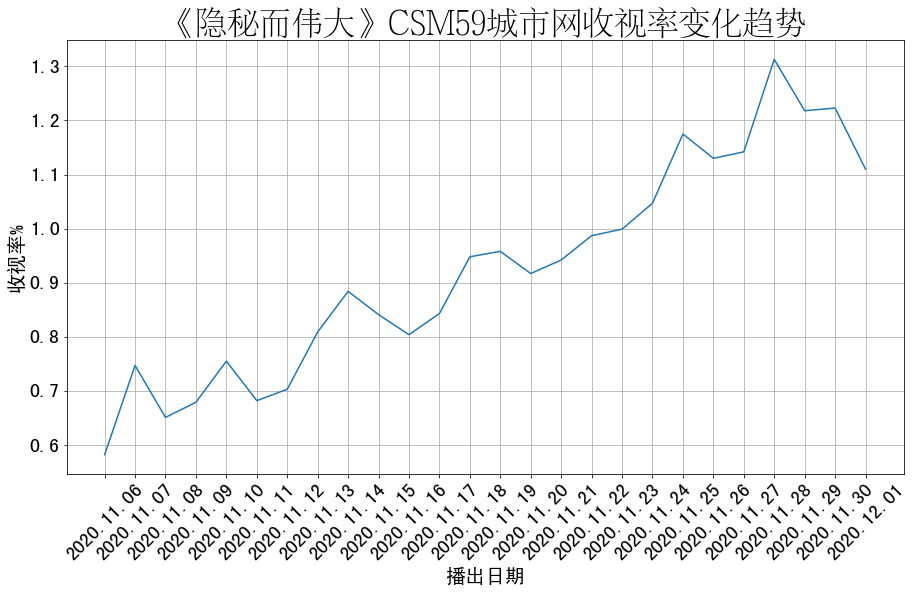

In [ ]:

import matplotlib.pyplot as plt
import numpy as np 
import json
import matplotlib.font_manager as font_manager
import pandas as pd
#显示matplotlib生成的图形，直接生成在代码区，而不是新的窗口
%matplotlib inline
font = font_manager.FontProperties(fname='/usr/share/fonts/fangzheng/FZSYJW.TTF', size=32) # 创建字体对象

# 读取work/viewing_infos.json文件中的broadcastDate字段，并将其value转化为字符串类型
df = pd.read_json('work/viewing_infos.json',dtype = {'broadcastDate' : str})
#print(df)

broadcastDate_list = df['broadcastDate']
csm59_rating_list = df['csm59_rating']

plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.figure(figsize=(15,8))
plt.title("《隐秘而伟大》CSM59城市网收视率变化趋势",fontproperties=font) 
plt.xlabel("播出日期",fontsize=20) 
plt.ylabel("收视率%",fontsize=20) 
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.plot(broadcastDate_list,csm59_rating_list) 
plt.grid() 
plt.savefig('/home/aistudio/work/chart01.jpg')
plt.show()

## 二、 绘制CSM59城市网和CSM全国网收视率变化趋势，并进行对比

<class 'pandas.core.frame.DataFrame'>


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


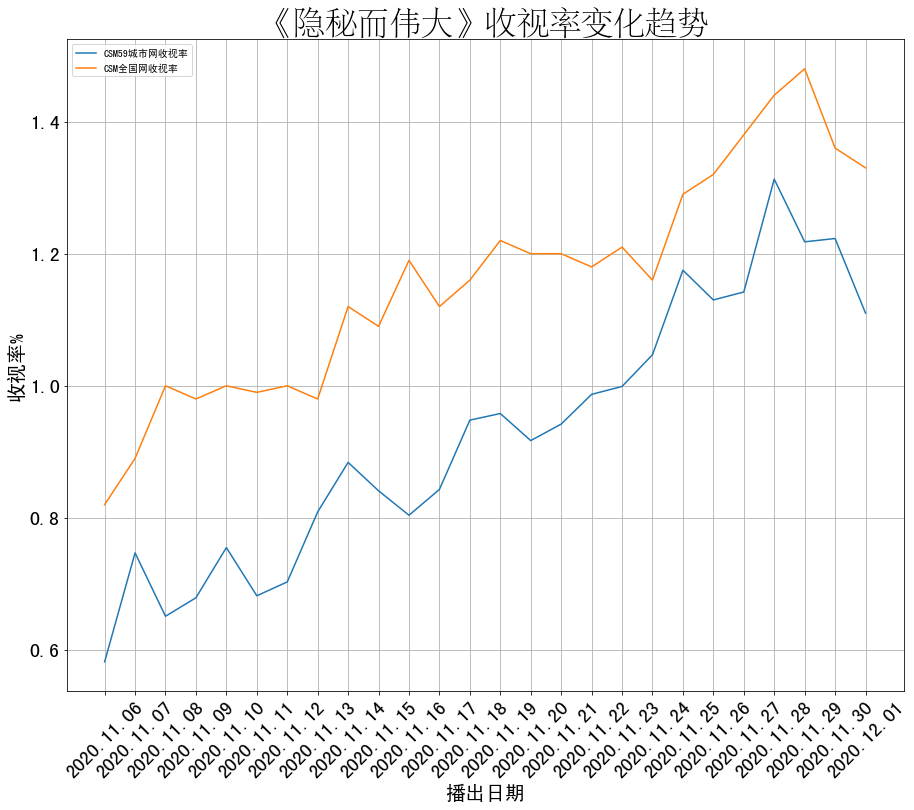

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import pandas as pd
#显示matplotlib生成的图形
%matplotlib inline

font = font_manager.FontProperties(fname='/usr/share/fonts/fangzheng/FZSYJW.TTF', size=32) # 创建字体对象
df = pd.read_json('work/viewing_infos.json',dtype = {'broadcastDate' : str})
print(type(df))
# print(df)
broadcastDate_list = df['broadcastDate']
# print(type(broadcastDate_list))
# print(broadcastDate_list)
csm59_rating_list = df['csm59_rating']
# print(type(csm59_rating_list))
# print(csm59_rating_list)
csm_rating_list = df['csm_rating']
# print(type(csm_rating_list))
# print(csm_rating_list)

# plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.figure(figsize=(15,12))
plt.title("《隐秘而伟大》收视率变化趋势",fontproperties= font)
plt.xlabel("播出日期",fontsize=20) 
plt.ylabel("收视率%",fontsize=20) 
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.plot(broadcastDate_list,csm59_rating_list,label = "CSM59城市网收视率") 
plt.plot(broadcastDate_list,csm_rating_list,label = "CSM全国网收视率") 
plt.legend()
plt.grid() 
plt.savefig('/home/aistudio/work/chart02.jpg')
plt.show()